In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
# from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('punkt') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yuval\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df=pd.read_csv('Language Detection.csv')
df.tail()

,Text,Language
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada
10336,ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...,Kannada


In [4]:
df.shape, df.isnull().sum()

((10337, 2),
 Text        0
 Language    0
 dtype: int64)

In [5]:
df[df.duplicated()]

,Text,Language
1141,i'm sorry.,English
1180,oh my god.,English
1196,i'm sorry.,English
1724,എന്നോട് ക്ഷമിക്കൂ.,Malayalam
1767,ഓ എന്റെ ദൈവമേ.,Malayalam
...,...,...
9706,Ach du lieber Gott.,German
9726,Es tut mir Leid.,German
10081,ನನ್ನನ್ನು ಕ್ಷಮಿಸು.,Kannada
10125,ಓ ದೇವರೇ.,Kannada


In [6]:
df.drop_duplicates(inplace=True)
df.shape

(10271, 2)

In [7]:
df["Language"].nunique()

17

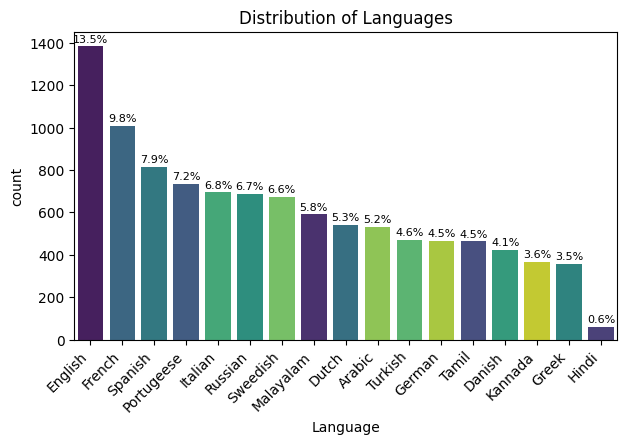

In [10]:
# Count plot with percentage annotations
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='Language', data=df, palette='viridis', order=df['Language'].value_counts().index, hue='Language')
plt.title('Distribution of Languages')
plt.xticks(rotation=45, ha='right')

# Add percentage annotations
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 20
    ax.text(x, y, percentage, ha='center', fontsize=8)
plt.show()

In [11]:
import re
def clean_function(Text):
    # removing the symbols and numbers
    Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)
    
    # converting the text to lower case
    Text = Text.lower()
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc
    Text = re.sub('#\S+', '', Text)  # remove hashtags
    Text = re.sub('@\S+', '  ', Text)  # remove mentions
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace
    
    return Text

In [13]:
df['Cleaned_Text'] = df['Text'].apply(clean_function)
df.head()

,Text,Language,Cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...


In [14]:
x = df['Cleaned_Text']
y = df['Language']


In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [32]:
models_score={}


In [33]:
def report(y_test, y_pred):
    accuracy=accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
    disp.plot()
    return accuracy

Support Vector Machine
Accuracy: 0.9968354430379747
Accuracy: 0.9600973236009732
              precision    recall  f1-score   support

      Arabic       1.00      0.94      0.97       106
      Danish       0.97      0.92      0.95        85
       Dutch       0.99      0.97      0.98       108
     English       0.98      0.98      0.98       277
      French       1.00      0.96      0.98       202
      German       0.99      0.94      0.96        93
       Greek       1.00      0.93      0.96        72
       Hindi       1.00      0.83      0.91        12
     Italian       0.99      0.95      0.97       139
     Kannada       1.00      0.96      0.98        73
   Malayalam       1.00      0.97      0.98       118
  Portugeese       0.99      0.95      0.97       147
     Russian       0.71      1.00      0.83       138
     Spanish       0.94      0.97      0.95       163
    Sweedish       0.98      0.97      0.97       135
       Tamil       1.00      0.96      0.98        93


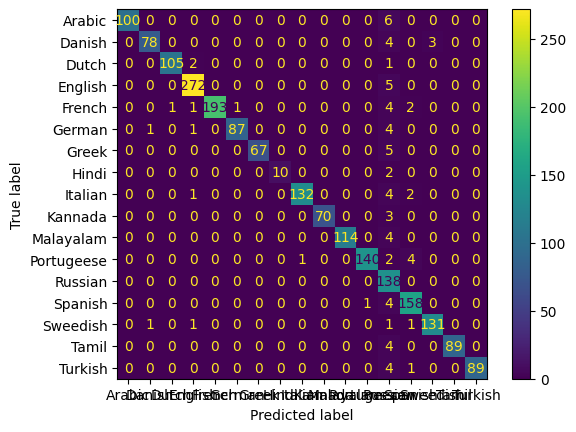

In [35]:
# Creating a pipeline for Support Vector Machine
svm = Pipeline([('tfidf', TfidfVectorizer()), ('svm', SVC(kernel='linear'))])
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
y_train_pred = svm.predict(x_train)
print('Support Vector Machine')
print('Accuracy:', accuracy_score(y_train, y_train_pred))
models_score['svc']=report(y_test, y_pred)

Multinomial Naive Bayes
Accuracy: 0.9810126582278481
Accuracy: 0.9586374695863747
              precision    recall  f1-score   support

      Arabic       1.00      0.92      0.96       106
      Danish       1.00      0.91      0.95        85
       Dutch       1.00      0.96      0.98       108
     English       0.79      1.00      0.88       277
      French       0.99      0.99      0.99       202
      German       1.00      0.92      0.96        93
       Greek       1.00      0.93      0.96        72
       Hindi       1.00      0.67      0.80        12
     Italian       1.00      0.96      0.98       139
     Kannada       1.00      0.96      0.98        73
   Malayalam       1.00      0.97      0.99       118
  Portugeese       0.99      0.96      0.98       147
     Russian       1.00      0.93      0.96       138
     Spanish       0.98      0.98      0.98       163
    Sweedish       0.96      0.98      0.97       135
       Tamil       1.00      0.99      0.99        93

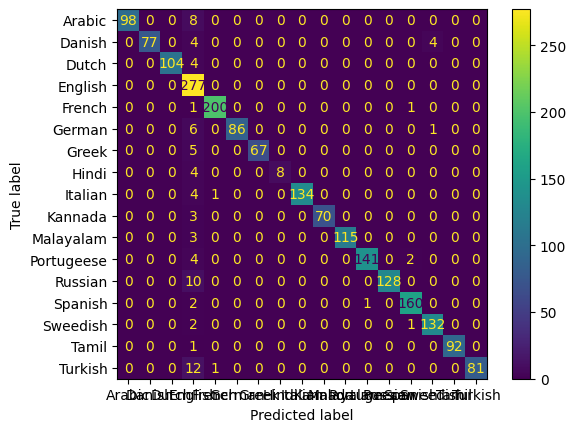

In [34]:
# Creating a pipeline for Multinomial Naive Bayes
nb = Pipeline([('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
y_train_pred = nb.predict(x_train)
print('Multinomial Naive Bayes')
print('Accuracy:', accuracy_score(y_train, y_train_pred))
models_score['mnb']=report(y_test, y_pred)

Logistic Regression
Accuracy: 0.9940360272638754
Accuracy: 0.9596107055961071
              precision    recall  f1-score   support

      Arabic       1.00      0.94      0.97       106
      Danish       0.99      0.92      0.95        85
       Dutch       0.99      0.97      0.98       108
     English       0.98      0.99      0.98       277
      French       0.99      0.96      0.97       202
      German       0.99      0.94      0.96        93
       Greek       1.00      0.93      0.96        72
       Hindi       1.00      0.83      0.91        12
     Italian       1.00      0.94      0.97       139
     Kannada       1.00      0.96      0.98        73
   Malayalam       1.00      0.96      0.98       118
  Portugeese       0.99      0.96      0.98       147
     Russian       0.70      1.00      0.83       138
     Spanish       0.95      0.97      0.96       163
    Sweedish       0.97      0.96      0.97       135
       Tamil       1.00      0.96      0.98        93
   

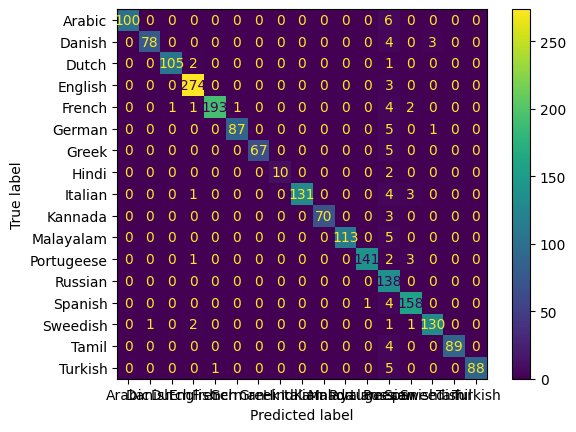

In [36]:
# Creating a pipeline for Logistic Regression
lr = Pipeline([('tfidf', TfidfVectorizer()), ('lr', LogisticRegression())])
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_train_pred = lr.predict(x_train)
print('Logistic Regression')
print('Accuracy:', accuracy_score(y_train, y_train_pred))
models_score['lr']=report(y_test, y_pred)

Random Forest
Accuracy: 0.998539435248296
Accuracy: 0.9206812652068127
              precision    recall  f1-score   support

      Arabic       1.00      0.91      0.95       106
      Danish       0.97      0.87      0.92        85
       Dutch       0.96      0.96      0.96       108
     English       0.98      0.96      0.97       277
      French       0.99      0.93      0.96       202
      German       0.95      0.90      0.93        93
       Greek       1.00      0.93      0.96        72
       Hindi       1.00      0.92      0.96        12
     Italian       0.96      0.90      0.93       139
     Kannada       0.39      1.00      0.56        73
   Malayalam       1.00      0.92      0.96       118
  Portugeese       0.97      0.93      0.95       147
     Russian       1.00      0.86      0.92       138
     Spanish       0.90      0.90      0.90       163
    Sweedish       0.96      0.95      0.96       135
       Tamil       1.00      0.97      0.98        93
     Turki

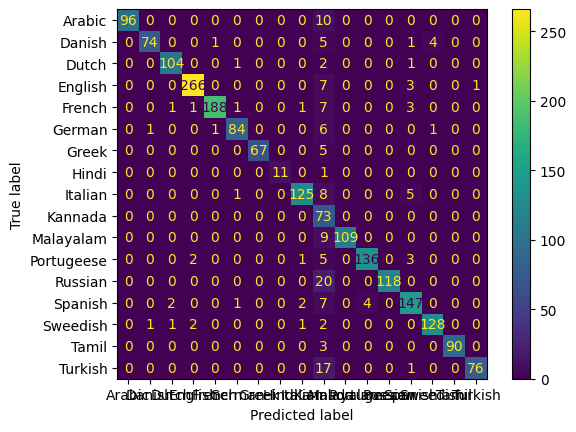

In [37]:
# Creating a pipeline for Random Forest
rf = Pipeline([('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
y_train_pred = rf.predict(x_train)
print('Random Forest')
print('Accuracy:', accuracy_score(y_train, y_train_pred))
models_score['rf']=report(y_test, y_pred)

Gradient Boosting
Accuracy: 0.9965920155793574
Accuracy: 0.908029197080292
              precision    recall  f1-score   support

      Arabic       1.00      0.91      0.95       106
      Danish       0.97      0.82      0.89        85
       Dutch       0.96      0.93      0.94       108
     English       0.95      0.95      0.95       277
      French       0.97      0.92      0.94       202
      German       0.99      0.89      0.94        93
       Greek       1.00      0.90      0.95        72
       Hindi       1.00      0.83      0.91        12
     Italian       0.94      0.86      0.90       139
     Kannada       1.00      0.89      0.94        73
   Malayalam       1.00      0.91      0.95       118
  Portugeese       0.98      0.87      0.92       147
     Russian       0.53      1.00      0.70       138
     Spanish       0.86      0.91      0.88       163
    Sweedish       0.95      0.94      0.94       135
       Tamil       1.00      0.89      0.94        93
     T

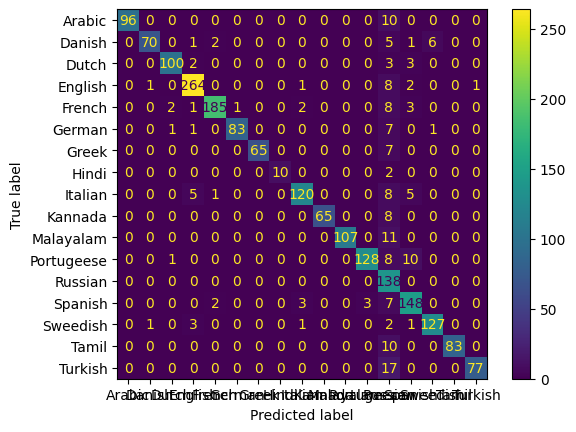

In [38]:
# Creating a pipeline for Gradient Boosting
gb = Pipeline([('tfidf', TfidfVectorizer()), ('gb', GradientBoostingClassifier())])
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
y_train_pred = gb.predict(x_train)
print('Gradient Boosting')
print('Accuracy:', accuracy_score(y_train, y_train_pred))
models_score['gb']=report(y_test, y_pred)

d:\Vegeta\Projects\DL projects\NewsGenius\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
Accuracy: 0.5596397273612463
Accuracy: 0.5532846715328467
              precision    recall  f1-score   support

      Arabic       1.00      0.47      0.64       106
      Danish       0.90      0.51      0.65        85
       Dutch       0.82      0.59      0.69       108
     English       0.97      0.78      0.86       277
      French       0.93      0.28      0.43       202
      German       1.00      0.62      0.77        93
       Greek       1.00      0.56      0.71        72
       Hindi       1.00      0.83      0.91        12
     Italian       1.00      0.50      0.67       139
     Kannada       1.00      0.32      0.48        73
   Malayalam       1.00      0.48      0.65       118
  Portugeese       1.00      0.25      0.40       147
     Russian       0.16      0.99      0.27       138
     Spanish       0.36      0.58      0.45       163
    Sweedish       1.00      0.68      0.81       135
       Tamil       1.00      0.71      0.83        93
     Turkish  

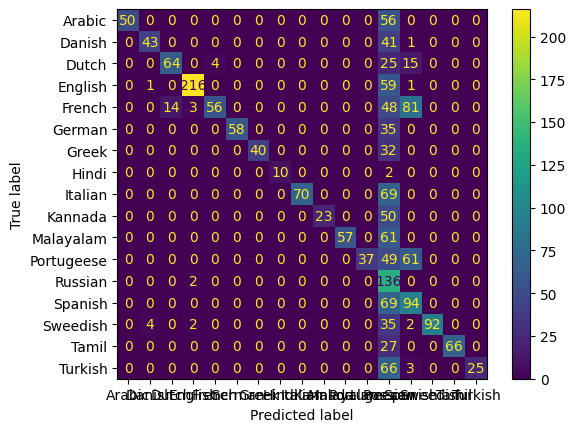

In [39]:
# Creating a pipeline for AdaBoost
ab = Pipeline([('tfidf', TfidfVectorizer()), ('ab', AdaBoostClassifier())])
ab.fit(x_train, y_train)
y_pred = ab.predict(x_test)
y_train_pred = ab.predict(x_train)
print('AdaBoost')
print('Accuracy:', accuracy_score(y_train, y_train_pred))
models_score['ab']=report(y_test, y_pred)

Extra Trees
Accuracy: 0.998539435248296
Accuracy: 0.9367396593673966
              precision    recall  f1-score   support

      Arabic       1.00      0.92      0.96       106
      Danish       0.97      0.92      0.95        85
       Dutch       0.95      0.97      0.96       108
     English       0.99      0.96      0.97       277
      French       1.00      0.96      0.98       202
      German       0.99      0.94      0.96        93
       Greek       1.00      0.93      0.96        72
       Hindi       1.00      0.92      0.96        12
     Italian       0.96      0.91      0.94       139
     Kannada       0.44      1.00      0.61        73
   Malayalam       1.00      0.95      0.97       118
  Portugeese       0.98      0.94      0.96       147
     Russian       1.00      0.87      0.93       138
     Spanish       0.92      0.92      0.92       163
    Sweedish       0.97      0.96      0.96       135
       Tamil       1.00      0.97      0.98        93
     Turkish

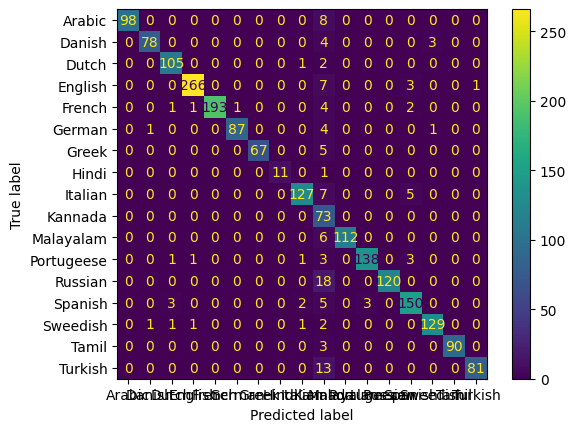

In [40]:
# Creating a pipeline for Extra Trees
et = Pipeline([('tfidf', TfidfVectorizer()), ('et', ExtraTreesClassifier())])
et.fit(x_train, y_train)
y_pred = et.predict(x_test)
y_train_pred = et.predict(x_train)
print('Extra Trees')
print('Accuracy:', accuracy_score(y_train, y_train_pred))
models_score['et']=report(y_test, y_pred)

In [42]:
pd.DataFrame(models_score.values(), index=models_score.keys(), columns=['Accuracy']).sort_values(by='Accuracy', ascending=False)

,Accuracy
svc,0.960097
lr,0.959611
mnb,0.958637
et,0.936740
rf,0.920681
gb,0.908029
ab,0.553285


In [51]:
# The best model is Support Vector Machine 
import joblib
joblib.dump(svm, 'language_detector.pkl')

['language_detector.pkl']

In [50]:
# Load the model
model = joblib.load('language_detector.pkl')

# Test the model
text = ['Hola, como estas?', 'Hello, how are you?', 'Bonjour, comment ca va?', 'Hallo, wie geht es dir?', 'Ciao, come stai?']
model.predict(text)
# Output: array(['Spanish', 'English', 'French', 'German', 'Italian'], dtype=object)

array(['Spanish', 'English', 'French', 'German', 'Italian'], dtype=object)

In [54]:
text='Die israelische Armee hat offenbar Panzer vom Komplex des Al-Schifa-Krankenhauses im Gazastreifen abgezogen. Ein Journalist der Nachrichtenagentur AFP, der sich in der Nähe der Klinik aufhielt, beobachtete am Morgen, wie Panzer und Fahrzeuge das Gelände verließen. Das Militär bestätigte den Abzug. Die Truppen hätten den Bereich nach einer "präzisen operativen Aktivität" wieder verlassen.Ein Arzt sagte AFP, mehr als 20 Leichen seien geborgen worden. Manche von ihnen seien von abziehenden Fahrzeugen überrollt worden. Das von der militant-islamistischen Hamas kontrollierte Gesundheitsministerium im Gazastreifen sprach von 300 Leichenfunden. Es gebe zudem sehr große Sachschäden.Anwohner sagten der Nachrichtenagentur AP, das Gelände sei "total zerstört" worden. Mehrere Gebäude seien niedergebrannt. Hunderte Menschen seien am Morgen in die Umgebung der Klinik zurückgekehrt und hätten Leichen im Gebäude und in der direkten Umgebung gefunden.Ein Anwohner berichtete, in dem Krankenhaus seien immer noch Patienten, Mitarbeiter und Menschen, die dort Zuflucht vor den Kriegshandlungen gesucht hätten. Planierraupen der Armee hätten einen Behelfsfriedhof auf dem Krankenhausgelände umgepflügt. "Die Situation ist unbeschreiblich", sagte er. "Die Besatzung hat jegliches Leben hier zerstört."'

In [56]:
model.predict([text])

array(['German'], dtype=object)